In [26]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib
import seaborn as sns
import itertools
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import PassiveAggressiveClassifier
from sklearn.metrics import accuracy_score, confusion_matrix

df = pd.read_csv("/Users/gatae/OneDrive/Desktop/news.csv")

print(df)
df.head()
lb=df.label
lb.head()
df.drop_duplicates(inplace= True)
df.shape
df.isnull().sum()

x_train,x_test,y_train,y_test=train_test_split(df['text'], lb, test_size=0.2, random_state=7)

tfidf_vectorizer=TfidfVectorizer(stop_words='english', max_df=0.7)
tfidf_train=tfidf_vectorizer.fit_transform(x_train) 
tfidf_test=tfidf_vectorizer.transform(x_test)
 
pac=PassiveAggressiveClassifier(max_iter=50)
pac.fit(tfidf_train,y_train)

y_pred=pac.predict(tfidf_test)
score=accuracy_score(y_test,y_pred)
 
print("Accuracy: ",round(score*100,2),"%")


pac_con=confusion_matrix(y_test,y_pred, labels=['FAKE','REAL'])
print("Confusion Matrix for PassiveAgressiveClassifier",end="\n")
print(pac_con)





      Unnamed: 0                                              title  \
0           8476                       You Can Smell Hillary’s Fear   
1          10294  Watch The Exact Moment Paul Ryan Committed Pol...   
2           3608        Kerry to go to Paris in gesture of sympathy   
3          10142  Bernie supporters on Twitter erupt in anger ag...   
4            875   The Battle of New York: Why This Primary Matters   
...          ...                                                ...   
6330        4490  State Department says it can't find emails fro...   
6331        8062  The ‘P’ in PBS Should Stand for ‘Plutocratic’ ...   
6332        8622  Anti-Trump Protesters Are Tools of the Oligarc...   
6333        4021  In Ethiopia, Obama seeks progress on peace, se...   
6334        4330  Jeb Bush Is Suddenly Attacking Trump. Here's W...   

                                                   text label  
0     Daniel Greenfield, a Shillman Journalism Fello...  FAKE  
1     Google Pinter

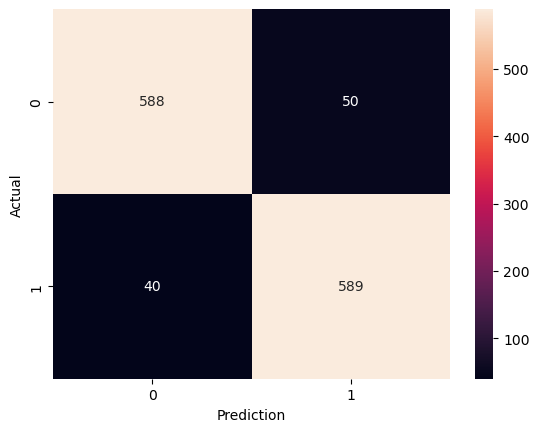

In [27]:
ax = sns.heatmap(confusion_matrix(y_test,y_pred), annot=True, fmt="d")
ax.set(xlabel='Prediction', ylabel='Actual')
plt.show()

In [25]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

conf_matrix = confusion_matrix(y_test, y_pred, labels=['FAKE', 'REAL'])

conf_matrix_table = classification_report(y_test, y_pred, labels=['FAKE', 'REAL'])

print(conf_matrix_table)

              precision    recall  f1-score   support

        FAKE       0.93      0.92      0.93       638
        REAL       0.92      0.93      0.93       629

    accuracy                           0.93      1267
   macro avg       0.93      0.93      0.93      1267
weighted avg       0.93      0.93      0.93      1267

